In [ ]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 742.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 137.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 131.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [1]:
import os
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

Mounted at /content/drive/


In [3]:


DATASET_PATH = "/content/drive/MyDrive/Flower_Classification_deep_Learing/flowers/train"

dirs = os.listdir(DATASET_PATH)

total = 0
for folder in dirs:
    folder_path = os.path.join(DATASET_PATH, folder)

    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        print(f"{folder} Folder has {len(files)} Images")
        total += len(files)

print(f"Total Images in Test Dataset: {total}")


dandelion Folder has 646 Images
tulip Folder has 607 Images
rose Folder has 497 Images
sunflower Folder has 495 Images
daisy Folder has 501 Images
Total Images in Test Dataset: 2746


In [ ]:
image_size=180
batch_size=32



In [ ]:
train_data_set=tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_size, image_size),
    batch_size=batch_size

)
valide_data_set=tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_size, image_size),
    batch_size=batch_size)


Found 2746 files belonging to 5 classes.
Using 2197 files for training.
Found 2746 files belonging to 5 classes.
Using 549 files for validation.


In [ ]:
flower_name=train_data_set.class_names
print(flower_name)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [ ]:
import matplotlib.pyplot as plt


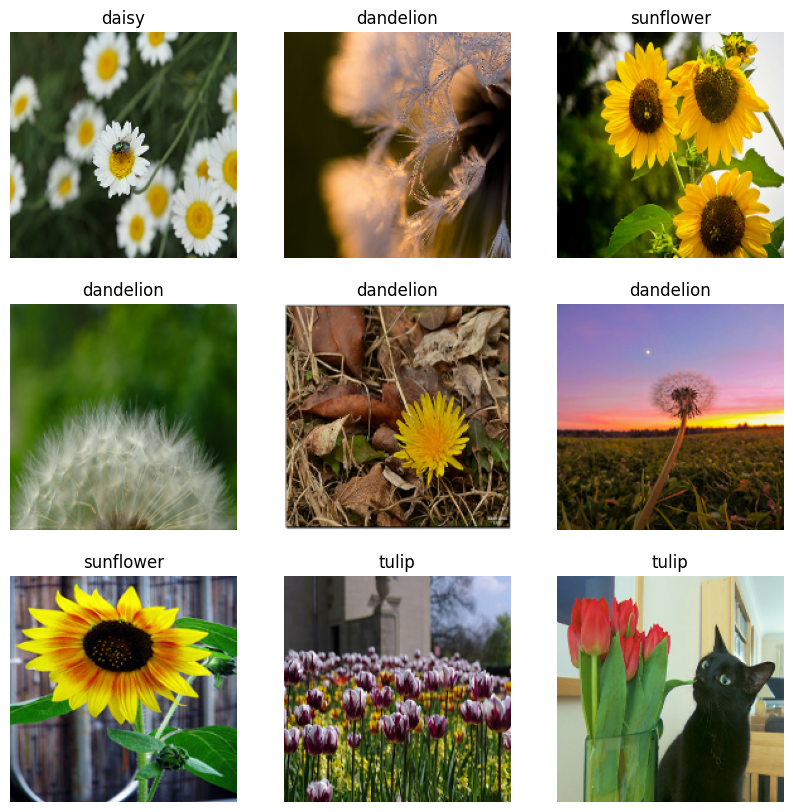

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_data_set.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_name[labels[i]])
        plt.axis('off')

In [ ]:
autotune=tf.data.AUTOTUNE

train_data_set=train_data_set.cache().shuffle(1000).prefetch(buffer_size=autotune)
valide_data_set=valide_data_set.cache().prefetch(buffer_size=autotune)

In [ ]:
data_agumentation=Sequential([
    layers.RandomFlip("horizontal",input_shape=(image_size,image_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


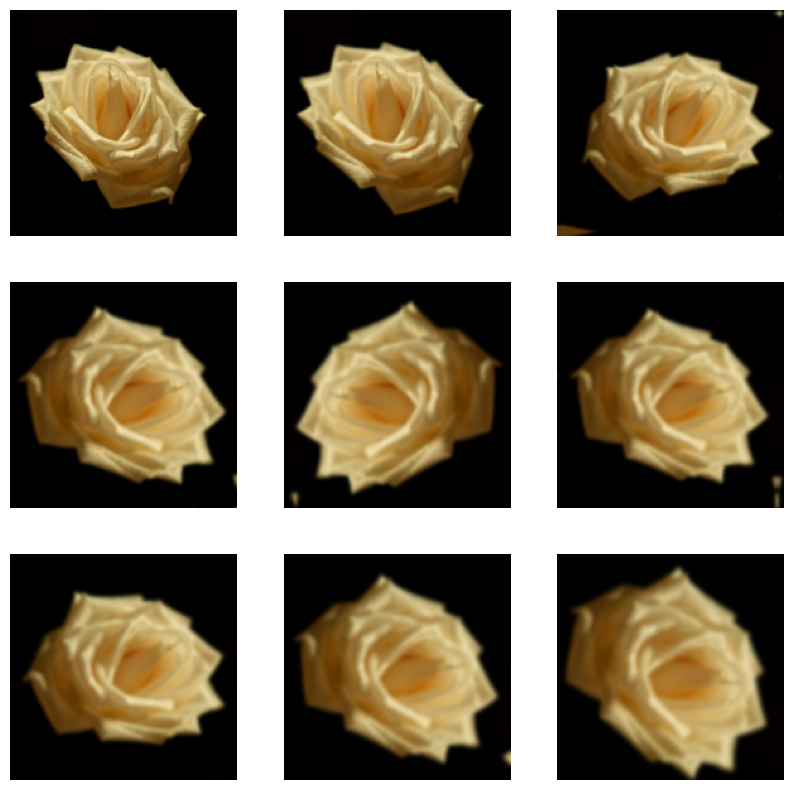

In [ ]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_data_set.take(1):
    for i in range(9):
        images=data_agumentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
model=Sequential(
    [
        data_agumentation,
        layers.Rescaling(1./255,input_shape=(180,180,3)),
        layers.Conv2D(16,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128,activation='relu'),
        layers.Dense(len(flower_name))
    ]
)

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_data_set,validation_data=valide_data_set,epochs=15)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 35s 496ms/step - accuracy: 0.2889 - loss: 1.6323 - val_accuracy: 0.4117 - val_loss: 1.3179
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 419ms/step - accuracy: 0.5077 - loss: 1.1810 - val_accuracy: 0.5337 - val_loss: 1.1230
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 418ms/step - accuracy: 0.5791 - loss: 1.0170 - val_accuracy: 0.5647 - val_loss: 1.0797
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 416ms/step - accuracy: 0.6230 - loss: 0.9600 - val_accuracy: 0.6284 - val_loss: 0.9685
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 415ms/step - accuracy: 0.6573 - loss: 0.8575 - val_accuracy: 0.6430 - val_loss: 0.9643
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 416ms/step - accuracy: 0.6880 - loss: 0.8183 - val_accuracy: 0.6412 - val_loss: 0.9134
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 412ms/step - accuracy: 0.6829 - loss: 0.7728 - val_accuracy: 0.6648 - val_loss: 0.8763
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 409ms/step - accuracy: 0.7346 - loss: 0.7182 - val_accu

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

In [ ]:
def Flower_Image_Prediction(image_path):
    image_load=tf.keras.utils.load_img(image_path,target_size=(180,180))
    image_load=tf.keras.utils.img_to_array(image_load)
    image_load=tf.expand_dims(image_load,0)
    prediction=model.predict(image_load)
    score = tf.nn.softmax(prediction[0])

    return flower_name[np.argmax(score)]

In [ ]:
image_name="/content/drive/MyDrive/Flower_Classification_deep_Learing/flowers/test/Image_2.jpg"
Flower_Image_Prediction(image_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


'sunflower'

In [ ]:
# model.save("/content/drive/MyDrive/Flower_Classification_deep_Learing/flower_model.keras")